In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
df = pd.read_csv('../data/btc-usd-max.csv', delimiter=',')
df['timestamp'] = pd.to_datetime(df['snapped_at'])
df['date'] = df['timestamp'].dt.to_period('D')
df.head()

C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_19364\138586530.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'] = df['timestamp'].dt.to_period('D')


,snapped_at,price,market_cap,total_volume,timestamp,date
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0,2013-04-28 00:00:00+00:00,2013-04-28
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0,2013-04-29 00:00:00+00:00,2013-04-29
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0,2013-04-30 00:00:00+00:00,2013-04-30
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0,2013-05-01 00:00:00+00:00,2013-05-01
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0,2013-05-02 00:00:00+00:00,2013-05-02


In [29]:
df_2021 = df[(df['date'].dt.year == 2021)]
df_2021 = df_2021[['date','price']]
df_2021.head()

,date,price
2803,2021-01-01,29022.418395
2804,2021-01-02,29352.126792
2805,2021-01-03,32163.824935
2806,2021-01-04,33008.226203
2807,2021-01-05,31515.575967


In [30]:
# Convert 'date' to datetime
df_2021['date'] = pd.to_datetime(df_2021['date'].dt.to_timestamp())

d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

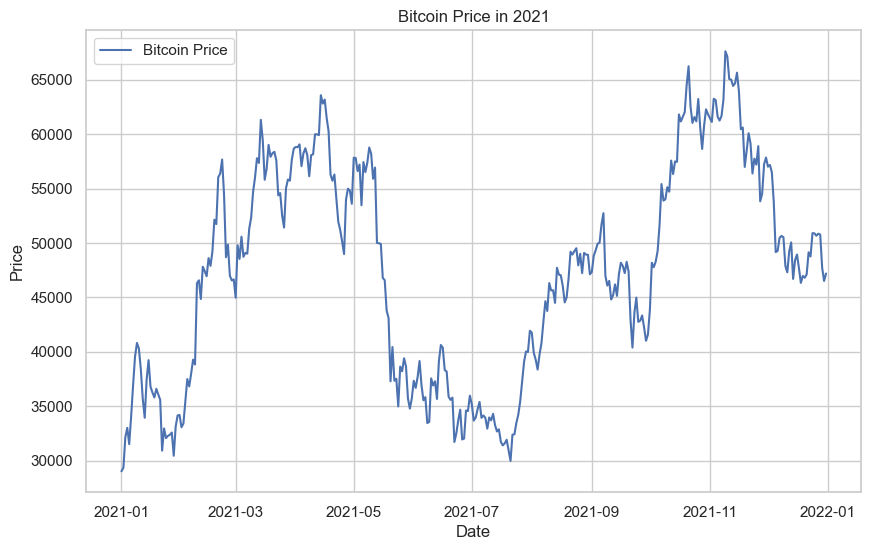

In [31]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='price', data=df_2021, label='Bitcoin Price')

# Title and labels
plt.title('Bitcoin Price in 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.show()


d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

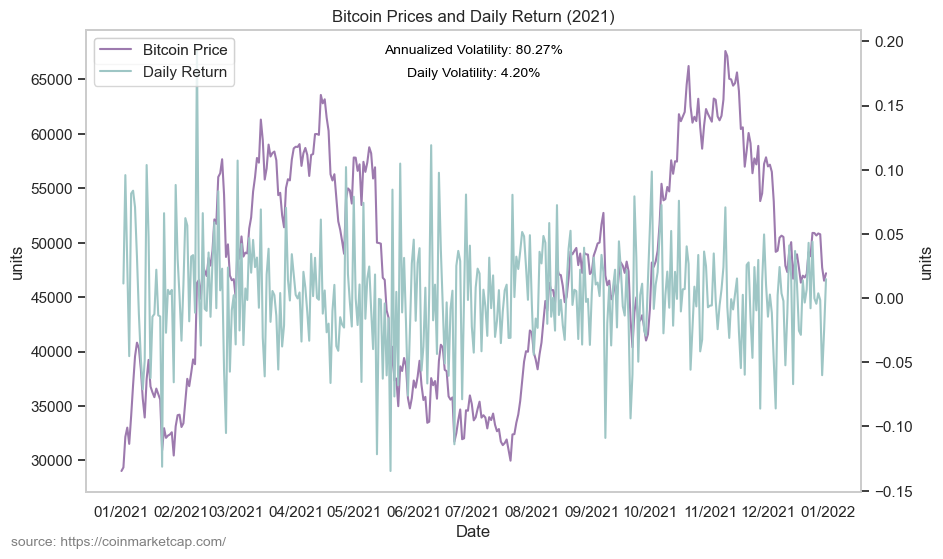

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial']

# Calculate daily returns
df_2021['daily_return'] = df_2021['price'].pct_change()

# Calculate standard deviation of daily returns
daily_volatility = np.std(df_2021['daily_return'])

# Annualize standard deviation
annualized_volatility = daily_volatility * np.sqrt(365)  # Assuming 252 trading days in a year

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['Arial']

# Plot Bitcoin price
sns.lineplot(data=df_2021, x='date', y='price', label='Bitcoin Price', ax=ax1, color = '#9D7AAE')

# Add labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('units')
ax1.tick_params(axis='y')
ax1.grid(False)

# Create a second y-axis for volatility
ax2 = ax1.twinx()
ax2.plot(df_2021['date'], df_2021['daily_return'], label='Daily Return', color='#9EC6C5')
ax2.set_ylabel('units')
ax2.tick_params(axis='y')
ax2.grid(False)

# Annotate the annualized and daily volatility rates
plt.annotate(f'Annualized Volatility: {annualized_volatility:.2%}', 
             xy=(0.5, 0.95), 
             xycoords='axes fraction', 
             ha='center', 
             fontsize=10, 
             fontfamily='Arial', 
             color='black')

plt.annotate(f'Daily Volatility: {daily_volatility:.2%}', 
             xy=(0.5, 0.90), 
             xycoords='axes fraction', 
             ha='center', 
             fontsize=10, 
             fontfamily='Arial',  
             color='black')

# Manually add legends
legend_lines = [plt.Line2D([0], [0], color='#9D7AAE', label='Bitcoin Price'),
                plt.Line2D([0], [0], color='#9EC6C5', label='Daily Return')]

plt.legend(handles=legend_lines, loc='upper left')

# Add a footer
fig.text(0.05, 0.02, 'source: https://coinmarketcap.com/', fontsize=10, color='gray')

# Format x-axis ticks to month/year
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
# ax1.tick_params(axis='x', rotation=20)  # Rotate x-axis ticks

ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=-1))
#ax1.grid(True, which='minor', linestyle='--', linewidth=0.5)

plt.title('Bitcoin Prices and Daily Return (2021)')
save_path = "../img/bitcoin_prices_and_return_2021.png"
plt.savefig(save_path, bbox_inches='tight')

plt.show()

d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

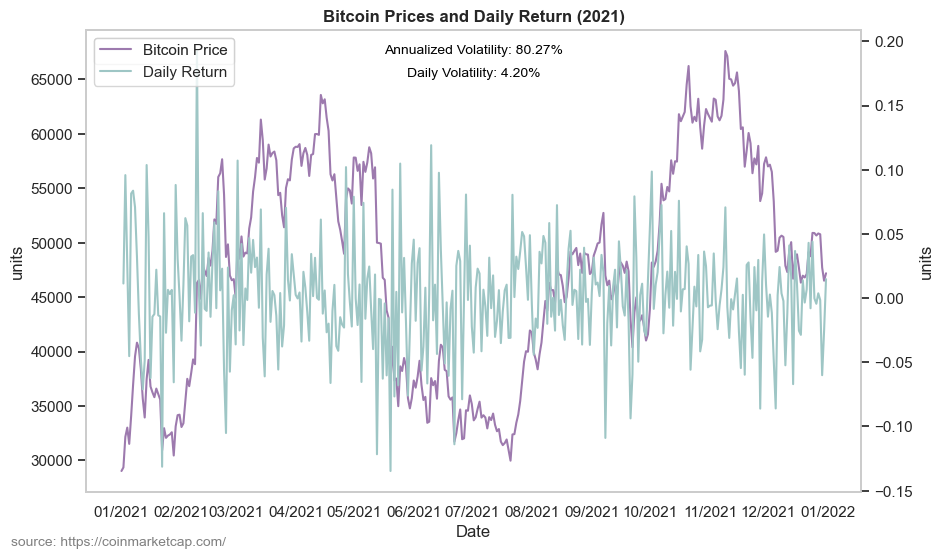

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial']

# Calculate daily returns
df_2021['daily_return'] = df_2021['price'].pct_change()

# Calculate standard deviation of daily returns
daily_volatility = np.std(df_2021['daily_return'])

# Annualize standard deviation
annualized_volatility = daily_volatility * np.sqrt(365)  # Assuming 252 trading days in a year

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin price
sns.lineplot(data=df_2021, x='date', y='price', label='Bitcoin Price', ax=ax1, color='#9D7AAE')

# Add labels and title
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('units', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(False)

# Create a second y-axis for volatility
ax2 = ax1.twinx()
ax2.plot(df_2021['date'], df_2021['daily_return'], label='Daily Return', color='#9EC6C5')
ax2.set_ylabel('units', fontsize=12)
ax2.tick_params(axis='y')
ax2.grid(False)

# Annotate the annualized and daily volatility rates
plt.annotate(f'Annualized Volatility: {annualized_volatility:.2%}', 
             xy=(0.5, 0.95), 
             xycoords='axes fraction', 
             ha='center', 
             fontsize=10, 
             fontfamily='Arial', 
             color='black')

plt.annotate(f'Daily Volatility: {daily_volatility:.2%}', 
             xy=(0.5, 0.90), 
             xycoords='axes fraction', 
             ha='center', 
             fontsize=10, 
             fontfamily='Arial',  
             color='black')

# Manually add legends
legend_lines = [plt.Line2D([0], [0], color='#9D7AAE', label='Bitcoin Price'),
                plt.Line2D([0], [0], color='#9EC6C5', label='Daily Return')]

plt.legend(handles=legend_lines, loc='upper left')

# Add a footer
fig.text(0.05, 0.02, 'source: https://coinmarketcap.com/', fontsize=10, color='gray')

# Format x-axis ticks to month/year
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
# ax1.tick_params(axis='x', rotation=20)  # Rotate x-axis ticks

ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=-1))
# ax1.grid(True, which='minor', linestyle='--', linewidth=0.5)

plt.title('Bitcoin Prices and Daily Return (2021)', fontweight='bold')

save_path = "../img/bitcoin_prices_and_return_2021.png"
plt.savefig(save_path, bbox_inches='tight')

plt.show()
